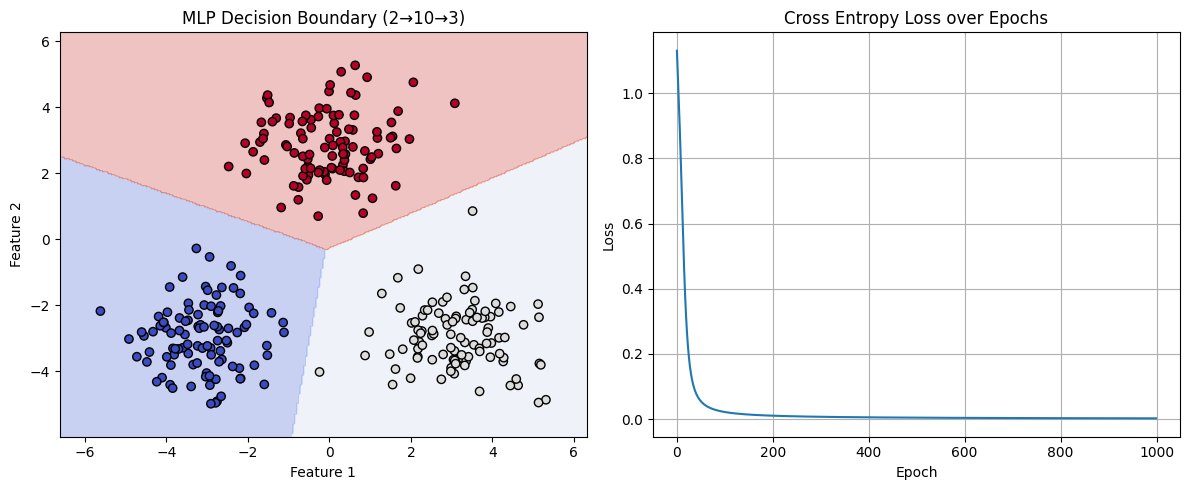

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ==== 1. Generate synthetic 2D data for 3 classes ====
np.random.seed(42)
n_class = 100
X1 = np.random.randn(n_class, 2) + np.array([-3, -3])
X2 = np.random.randn(n_class, 2) + np.array([3, -3])
X3 = np.random.randn(n_class, 2) + np.array([0, 3])
X = np.vstack([X1, X2, X3])  # shape: (300, 2)

# One-hot labels
y_int = np.array([0]*n_class + [1]*n_class + [2]*n_class)
y = np.zeros((y_int.size, 3))
y[np.arange(y_int.size), y_int] = 1  # shape: (300, 3)

# ==== 2. Model parameters ====
n_input = 2
n_hidden = 10
n_output = 3
n_samples = X.shape[0]

# Initialize weights
W1 = np.random.randn(n_input, n_hidden) * 0.1
b1 = np.zeros((1, n_hidden))
W2 = np.random.randn(n_hidden, n_output) * 0.1
b2 = np.zeros((1, n_output))

# Activation functions
def relu(x): return np.maximum(0, x)
def relu_deriv(x): return (x > 0).astype(float)

def softmax(z):
    z -= np.max(z, axis=1, keepdims=True)  # stability
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8), axis=1))

# ==== 3. Training ====
lr = 0.1
epochs = 1000
losses = []

for epoch in range(epochs):
    # Forward pass
    z1 = X @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    y_pred = softmax(z2)

    # Loss
    loss = cross_entropy(y, y_pred)
    losses.append(loss)

    # Backward pass
    dz2 = (y_pred - y) / n_samples
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    da1 = dz2 @ W2.T
    dz1 = da1 * relu_deriv(z1)
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update weights
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

# ==== 4. Predict grid for visualization ====
def predict(X_input):
    z1 = X_input @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    return np.argmax(softmax(z2), axis=1)

# Meshgrid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = predict(grid).reshape(xx.shape)

# ==== 5. Plot ====
plt.figure(figsize=(12, 5))

# Decision boundary
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y_int, cmap='coolwarm', edgecolor='k')
plt.title("MLP Decision Boundary (2→10→3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Loss curve
plt.subplot(1, 2, 2)
plt.plot(losses)
plt.title("Cross Entropy Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.tight_layout()
plt.show()
